### Bank Note Authentication

__Data was obtained from images captured from both genuine and counterfeit banknote-like specimens. To digitize these specimens, we employed an industrial camera typically employed for print inspection. The resulting images are 400x400 pixels in size. These high-quality grayscale images, acquired at a resolution of approximately 660 dots per inch (dpi), were then subjected to feature extraction using the Wavelet Transform technique.__

In [50]:
# models to read, view, clean and process the data
import pandas as pd
import numpy as np

# To visualize data as graphs and charts
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting data and selecting suitable model with highest accuracy and appropriate hyperparameters
from sklearn.model_selection import train_test_split # Splitting data

# to import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# To evaluate model accuracy
from sklearn.metrics import accuracy_score


In [51]:
bank_df=pd.read_csv('BankNote_Authentication.csv')

In [52]:
bank_df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [53]:
bank_df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [54]:
bank_df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

# Correlation among the features

<Axes: >

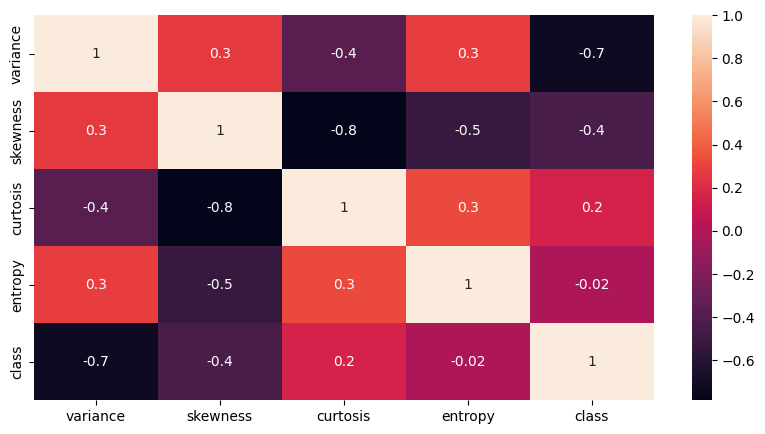

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(bank_df.corr(), annot=True, fmt='0.1g')

# Independent and Dependent features

In [11]:
x=bank_df.iloc[:,:-1]
y=bank_df.iloc[:,-1]

In [12]:
print("X", x.head(10))
print('------------------------------------')
print("Y", y.head(10))

X    variance  skewness  curtosis  entropy
0   3.62160    8.6661  -2.80730 -0.44699
1   4.54590    8.1674  -2.45860 -1.46210
2   3.86600   -2.6383   1.92420  0.10645
3   3.45660    9.5228  -4.01120 -3.59440
4   0.32924   -4.4552   4.57180 -0.98880
5   4.36840    9.6718  -3.96060 -3.16250
6   3.59120    3.0129   0.72888  0.56421
7   2.09220   -6.8100   8.46360 -0.60216
8   3.20320    5.7588  -0.75345 -0.61251
9   1.53560    9.1772  -2.27180 -0.73535
------------------------------------
Y 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: class, dtype: int64


In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)  #splitting of data for training and testing

# Model development

In [15]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
prediction =rfc_model.predict(X_test)
prediction

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
acc_score=accuracy_score(y_test,prediction)
print('Accuracy of RFC model is :',acc_score )

Accuracy of RFC model is : 0.9963636363636363


In [57]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("rfcmodel.pkl","wb")
pickle.dump(rfc_model, pickle_out)
pickle_out.close()

In [39]:
result = rfc_model.predict([[0,1,0,1]])
print ("Note authenticity :", result)

Note authenticity : [1]


C:\Users\PATIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
